In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# загрузка данных

test_data = pd.read_csv("https://raw.githubusercontent.com/Neronuser/iasa-kpi-ml-course/main/labs/lab_1_test.csv")
train_data = pd.read_csv("https://raw.githubusercontent.com/Neronuser/iasa-kpi-ml-course/main/labs/lab_1_train.csv")

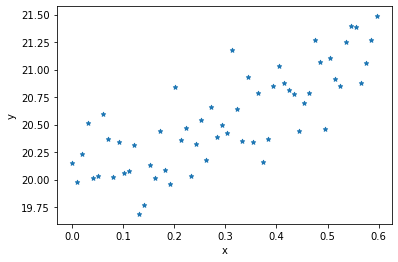

In [ ]:
# визуализация данных из train_data
train_data.plot("x", "y",  marker='*', kind="scatter")

In [ ]:
# параметры обучения
epochs_count = 6000
lerning_rate = 0.01

In [ ]:
# разделение данных на x, y
train_data_x = train_data["x"].to_numpy()
train_data_y = train_data["y"].to_numpy()

test_data_x = test_data["x"].to_numpy()
test_data_y = test_data["y"].to_numpy()

лучший результат:
 err                   0.036866
beta_0    [19.913698675955235]
beta_x     [2.129568399243081]
Name: 5999, dtype: object


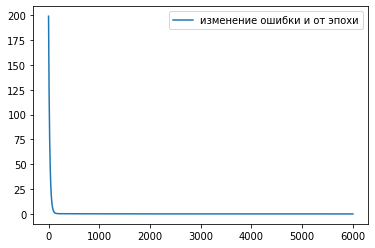

In [ ]:
# предгенерация весов
beta_0 = np.random.rand(1)
beta_x = np.random.rand(1)

results = []

# train
for epoch in range(epochs_count):
  prediction = beta_0 + (beta_x * train_data_x)

  sqrt_error = np.power(train_data_y - prediction, 2).mean() / 2
  
  grad_0 = (-2 * (train_data_y - prediction)).mean()
  grad_x = (-2 * (train_data_y - prediction) * train_data_x).mean()

  results.append([sqrt_error, beta_0, beta_x])

  beta_0 = beta_0 - lerning_rate * grad_0
  beta_x = beta_x - lerning_rate * grad_x

results = pd.DataFrame(results, columns=["err", "beta_0", "beta_x"])

best = results.iloc[results["err"].idxmin(),:]

print("лучший результат:\n", best)

plt.plot(range(epochs_count), results["err"], label="изменение ошибки и от эпохи")
plt.legend()

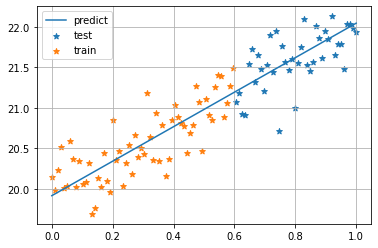

In [ ]:
#test
beta_0 = float(best["beta_0"])
beta_x = float(best["beta_x"])

def predict(x):
  return beta_0 + beta_x * x 

min_x = min(test_data["x"].min(), train_data["x"].min())
max_x = max(test_data["x"].max(), train_data["x"].max())

x = np.linspace(min_x, max_x, 100)
y = np.vectorize(predict)(x)

fig, axs = plt.subplots(1)

axs.plot(x, y, label="predict")
axs.scatter(test_data["x"], test_data["y"], marker='*', label="test")
axs.scatter(train_data["x"], train_data["y"], marker='*', label="train")

axs.legend()
axs.grid()